# Lab 1: From Raw Data to Key Insights  

### *A Structured Approach to Data Preprocessing, Exploratory Data Analysis (EDA), and Principal Component Analysis (PCA)*  
---


### Introduction: The Passenger Satisfaction Challenge


Imagine you are a **data scientist** on the airline’s **Customer Experience & Insights** team. Your job is to turn passenger feedback into simple, useful insights so managers can make smart, data-driven decisions.

One morning, your manager says:

> “Customer satisfaction is critical for us. We want to improve it continuously.  
> We just ran a large survey with **100,000+ passengers**.  
> **Which 2–3 factors are the main drivers of satisfaction?**”

### Your Mission:
Use the survey data to:
1. Identify the **key factors** that explain passenger satisfaction.
2. Apply **data exploration** techniques to understand the dataset.
3. Use **Principal Component Analysis (PCA)** to reduce dimensions and summarize the data.
4. Communicate your findings in a clear, actionable way.

By the end of this lab, you will:
- Understand how to explore and clean a dataset.
- Learn how to identify relationships between features and the target variable.
- Apply PCA to reduce dimensions and interpret the results.
- Practice communicating data-driven insights effectively.

## 1. Understand the Data
---

### 1.1 Data Overview: Airline Passenger Satisfaction

This dataset contains the results of a **large passenger survey**:
- **Rows**: Each row represents a passenger.
- **Columns**: Each column provides information about the passenger (e.g., age, delays, service ratings).

The dataset is adapted from [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction), a platform for sharing datasets and solving real-world data challenges.

**It has been modified to include *intentional missing values* so you can practice handling incomplete data.**
The dataset file is named `airline_satisfaction_missing.csv` and is located in the homework folder. Let’s start by loading the data into our notebook.


### 1.2 Required Libraries
---

Libraries are collections of pre-written code, functions, and tools that simplify common tasks. For this analysis, we will use libraries for data manipulation, numerical computation, and visualization.

> **Analogy:** Think of libraries as apps on your smartphone. Each app provides specific capabilities, like viewing photos or playing music. Similarly, in Python, libraries must be imported to use their functionalities.

To perform our analysis, we will use the following Python libraries:
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical computations.
- **matplotlib** and **seaborn**: For data visualization.
- **sklearn**: For machine learning tasks like imputing, scaling, and PCA.

Before we can use these libraries, we need to import them into our notebook. Let’s import the required libraries in the next code block.

In [1]:
# Importing libraries for data analysis and visualization
import pandas as pd                               # For working with datasets (loading, cleaning, etc.)
import numpy as np                                # For numerical computations
import matplotlib.pyplot as plt                   # For creating basic plots
import seaborn as sns                             # For creating advanced and attractive plots

# Importing libraries for machine learning tasks
from sklearn.impute import SimpleImputer         # For handling missing values
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.decomposition import PCA             # For dimensionality reduction

### 1.3 Loading the Dataset
---

To begin our analysis, we need to load the dataset into our notebook. The dataset is stored as a CSV file named `airline_satisfaction_missing.csv`.

- If the file is in the same folder as this notebook, you can use the filename directly.
- If it is in a different folder, provide the relative or absolute path.

Once the dataset is loaded, we will display the first few rows to confirm that it has been imported correctly and to get an initial look at the data.

In [2]:
# Path to the CSV file
# Update this if the file is in a different location
CSV_PATH = "airline_satisfaction_missing.csv"                                # same folder
# CSV_PATH = "../airline_satisfaction_missing.csv"                           # relative path
# CSV_PATH = "C:/Users/YourName/Downloads/airline_satisfaction_missing.csv"  # absolute path

# Load the dataset
df = pd.read_csv(CSV_PATH)

# Show first 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,target
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


### 1.4 Quick Overview of the Dataset
---

This dataset contains the results of a **passenger satisfaction survey**, where each row represents a passenger, and each column provides details about their experience. Here's a quick breakdown:

#### Key Terminology:
- **Sample (row):** A single passenger survey.
- **Feature (column):** A variable describing the passenger or their experience (e.g., age, delays, ratings).
- **Target variable (`y`):** The outcome we want to explain or predict (passenger satisfaction).
- **Feature matrix (`X`):** All features used to explain the target variable.

#### Dataset Details:
1. **Passenger Information**:
   - **Gender**: Female or Male.
   - **Customer Type**: Loyal or disloyal customer.
   - **Age**: Passenger's age in years.

2. **Trip Context**:
   - **Type of Travel**: Personal or Business.
   - **Class**: Business, Economy, or Economy Plus.
   - **Flight Distance**: Distance of the flight.

3. **Service Ratings (1–5)**:
   - Examples: **Seat comfort**, **Inflight entertainment**, **Food and drink**, **Cleanliness**, etc.

4. **Operational Metrics**:
   - **Departure Delay in Minutes** and **Arrival Delay in Minutes**.

5. **Target Variable**:
   - **Satisfaction**: Binary outcome (1 = Satisfied, 0 = Neutral or Dissatisfied).

In the next steps, we will explore this dataset to understand its structure and identify key features for analysis.

## 2. Exploratory Data Analysis (EDA)
---
### 2.1 Structured EDA Workflow

Exploratory Data Analysis (EDA) helps us understand the dataset before modeling. It ensures we avoid bad assumptions and uncover patterns that relate to our question.

#### Steps for EDA:
1. **Frame the Question**:
   - Goal: Identify the 2–3 factors that drive passenger satisfaction.
   - Action: Define the target variable (`satisfaction`) and check its balance (e.g., % satisfied vs not).

2. **Understand the Dataset**:
   - Goal: Get an overview of the dataset.
   - Action: Check the dataset’s shape, column names, and data types. Separate features into **categorical** and **numeric** groups.

3. **Handle Missing Values**:
   - Goal: Ensure no missing values break the analysis.
   - Action: Count missing values per column and fill them:
     - **Numeric features** → Fill with the median.
     - **Categorical features** → Fill with the mode.

4. **Explore Individual Features (Univariate Analysis)**:
   - Goal: Understand the distribution of key features.
   - Action: For 2–3 features (e.g., `Seat comfort`, `Flight Distance`), calculate **mean, median, min, max** and plot histograms.

5. **Compare Features with the Target (Bivariate Analysis)**:
   - Goal: Identify features that separate satisfied vs unsatisfied passengers.
   - Action: Compare medians and create boxplots for key features vs `satisfaction`.

6. **Check Relationships Between Features (Multivariate Analysis)**:
   - Goal: Spot redundant features.
   - Action: Create a correlation heatmap for numeric features and identify highly correlated pairs.

In the next steps, we will follow this workflow to explore the dataset and prepare it for analysis.

### Step 1: Frame the Question
---
The goal of this lab is to figure out what drives passenger satisfaction. So the very first thing we need to do is look at our **Target Variable**.

This variable tells us whether a passenger is satisfied (`1`) or not satisfied (`0`).
In this step, we will check its balance. 

**Actions:**
1. Count the number of satisfied (`1`) and not satisfied (`0`) passengers.
2. Calculate the percentage of each class to check if the dataset is balanced.

**Why does this matter?** If the dataset is heavily imbalanced: for example, if 90% of passengers are satisfied and only 10% are not, then any model we build later could be **biased**. It might just predict everyone as satisfied and still look like it’s doing a good job!*

In [4]:
# Step 1: Frame the Question
# Count the number of satisfied (1) and not satisfied (0) passengers
target_counts = df['target'].value_counts()

# Calculate the percentage of each class
target_percentages = (target_counts / len(df) * 100)

# Print the results
print("Target Variable: Passenger Satisfaction")
print("Meaning: 0 = Not Satisfied, 1 = Satisfied")
print("\nCounts:")
print(target_counts)
print("\nPercentages:")
print(target_percentages)

Target Variable: Passenger Satisfaction
Meaning: 0 = Not Satisfied, 1 = Satisfied

Counts:
target
0    58879
1    45025
Name: count, dtype: int64

Percentages:
target
0    56.666731
1    43.333269
Name: count, dtype: float64


<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Results:**
The dataset is reasonably balanced, with a slightly higher proportion of not satisfied passengers.
</div>

### Step 2: Data Overview and Feature Selection
---
This step is all about getting a big-picture overview of our dataset and deciding which columns we will actually use as features.

**Actions:**
1. Check the dataset shape (number of rows and columns).
2. Display the column names and their data types.
3. Identify and drop non-feature columns (e.g., `id`, `satisfaction`, `target`).
4. Separate the remaining columns into **categorical** and **numeric** features.

In [6]:
# Step 2: Data Overview and Feature Selection

# Check the shape of the dataset
print("Shape of the dataset (rows, columns):", df.shape)

# Display column names and their data types
print("\nColumn names and data types:")
print(df.dtypes.to_string())

# Identify non-feature columns to drop
non_feature_columns = {"Unnamed: 0", "id", "satisfaction", "target"}
features = df.columns.difference(non_feature_columns)

# Separate columns into categorical and numeric features
categorical_features = df[features].select_dtypes(include="object").columns.tolist()
numeric_features = df[features].select_dtypes(include="number").columns.tolist()

# Print the results
print("\nCategorical features:", categorical_features)
print("\nNumeric features:", numeric_features)

Shape of the dataset (rows, columns): (103904, 26)

Column names and data types:
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                         float64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service   

<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Results:**
- **Shape:** The dataset has 103,904 rows and 26 columns.
- **Categorical Features:** 'Gender', 'Customer Type', 'Type of Travel', 'Class'
- **Numeric Features:** 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', ...

The dataset contains **4 categorical features** and **18 numeric features**. Non-feature columns like *id* and *target* have been excluded from the analysis.
</div>

### Step 3: Missing Values and Simple Fixes
---
In real-world datasets, missing values are super common. People skip survey questions, systems fail to record data, or sometimes values just get lost along the way. If we don’t deal with missing values properly, our analysis could break or, even worse, give us misleading results.

In this step, we will identify columns with missing values and handle them to ensure the dataset is complete for analysis.

**Actions:**
1. Count the number of missing values in each column and calculate the percentage of missing data.
2. Use **median imputation** for numeric features and **mode imputation** for categorical features to fill missing values.
3. Confirm that no missing values remain in the dataset.

In [7]:
# Step 3: Missing Values and Simple Fixes

# Count missing values for each column
missing = df.isnull().sum()

# Keep only columns that actually have missing values
missing = missing[missing > 0]

# Create a summary DataFrame with count and percentage of missing values
missing_info = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': (missing / len(df)) * 100
})

# Display missing value summary
print("Missing Values Summary:")
print(missing_info)

Missing Values Summary:
                          Missing Count  Missing %
Seat comfort                       1039   0.999962
Arrival Delay in Minutes           1345   1.294464


In [ ]:
# Split the dataset into numeric and categorical subsets
num_data = df[numeric_features]
cat_data = df[categorical_features]

# Define imputers
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Apply imputers
num_imputed = pd.DataFrame(num_imputer.fit_transform(num_data), columns=numeric_features)
cat_imputed = pd.DataFrame(cat_imputer.fit_transform(cat_data), columns=categorical_features)

# Combine the imputed DataFrames
df_imputed = pd.concat([num_imputed, cat_imputed], axis=1)

# Check for any remaining missing values
print("\nRemaining missing values:", df_imputed.isnull().sum().sum())

# Create a new DataFrame that includes the imputed features + target column for next steps
df_ready = df_imputed.copy()

# Ensure correct alignment of the target column
df_ready["target"] = df["target"].values              

df_ready.head()


Remaining missing values: 0


,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Flight Distance,Food and drink,...,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort,Class,Customer Type,Gender,Type of Travel,target
0,13.0,18.0,4.0,4.0,5.0,25.0,4.0,3.0,460.0,5.0,...,3.0,3.0,4.0,3.0,5.0,Eco Plus,Loyal Customer,Male,Personal Travel,0
1,25.0,6.0,3.0,1.0,1.0,1.0,2.0,3.0,235.0,1.0,...,3.0,5.0,1.0,3.0,1.0,Business,disloyal Customer,Male,Business travel,0
2,26.0,0.0,4.0,4.0,5.0,0.0,2.0,2.0,1142.0,5.0,...,2.0,3.0,4.0,5.0,5.0,Business,Loyal Customer,Female,Business travel,1
3,25.0,9.0,3.0,1.0,2.0,11.0,5.0,5.0,562.0,2.0,...,2.0,5.0,2.0,2.0,2.0,Business,Loyal Customer,Female,Business travel,0
4,61.0,0.0,4.0,3.0,3.0,0.0,3.0,3.0,214.0,4.0,...,3.0,4.0,3.0,5.0,5.0,Business,Loyal Customer,Male,Business travel,1


<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Results:**
- **Arrival Delay in Minutes** → numeric (continuous).
  - Common strategy: "median" (robust against outliers).

- **Seat comfort** → ordinal (1–5 rating scale).
  - Common strategy: "most_frequent" (mode).

  
  *Seat comfort is stored as numbers (e.g., 1–5), but it’s an ordinal Likert-scale variable not a true continuous measurement. That’s why imputing with the mode (most frequent category) is often the better choice.*
 

- **Remaining Missing Values:** 0  
The dataset is now complete and ready for further analysis.
</div>

### Step 4: Univariate Checks (One Feature at a Time)
---
In this step, we look at **one feature at a time** to understand its basic behavior, things like distribution, central values (mean/median), spread, and outliers.  

This helps us spot unusual patterns, data quality issues, or features that might be especially informative later in the analysis.

**Actions:**
1. Select 2–3 key features (e.g., `Arrival Delay in Minutes`, `Seat Comfort`, `Inflight entertainment`).
2. For each feature, calculate and display **mean**, **median**, **min**, and **max**.
3. Plot histograms to visualize the distribution of these features.


--- Arrival Delay in Minutes ---
Mean   : 14.98
Median : 0.00
Min    : 0.00
Max    : 1584.00

--- Seat comfort ---
Mean   : 3.44
Median : 4.00
Min    : 0.00
Max    : 5.00

--- Inflight entertainment ---
Mean   : 3.36
Median : 4.00
Min    : 0.00
Max    : 5.00


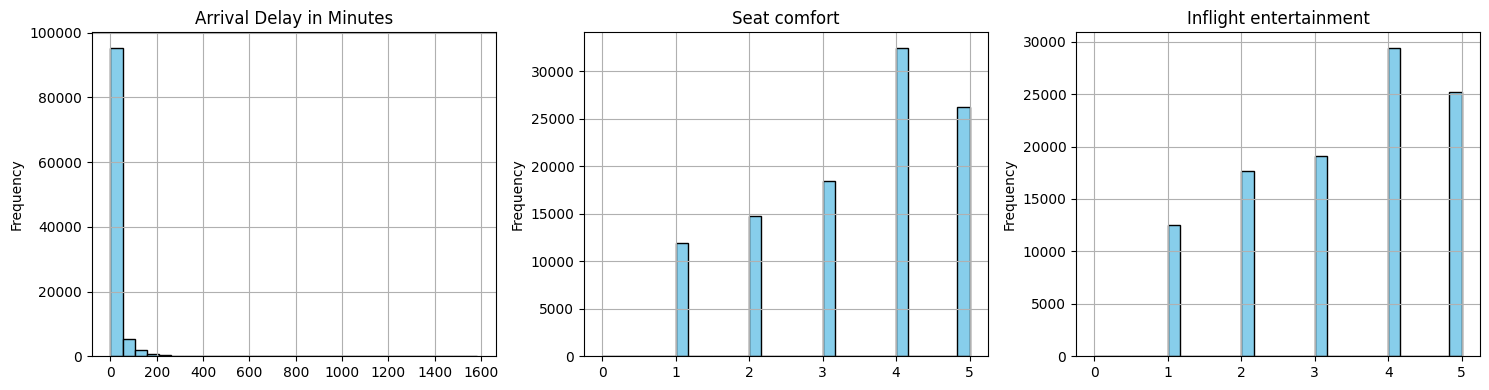

In [ ]:
# Step 4: Univariate Checks for Selected Features

# Choose 3 features to analyze
selected_features = ["Arrival Delay in Minutes", "Seat comfort", "Inflight entertainment"]

# Loop through each selected feature and calculate basic statistics (round to 2 decimal places)
for col in selected_features:
    print(f"\n--- {col} ---")
    print(f"Mean   : {df_imputed[col].mean():.2f}")
    print(f"Median : {df_imputed[col].median():.2f}")
    print(f"Min    : {df_imputed[col].min():.2f}")
    print(f"Max    : {df_imputed[col].max():.2f}")

# Set up histogram plotting
plt.figure(figsize=(15, 4))

# Plot histograms for each feature
for i, col in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    df_imputed[col].hist(bins=30, color="skyblue", edgecolor="black")
    plt.title(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Arrival Delay in Minutes**

- The **mean** delay is about 15 minutes, but the **median** is zero.
- That tells us most flights aren’t delayed at all.
- The histogram shows this clearly. Tons of flights at zero, with just a few really extreme delays over 1000 minutes.
- Those outliers pull the mean way up, which is why the median is a better summary here.
- So, insight: most flights are on time, and while extreme delays are interesting, they’re rare.

**Seat Comfort**

- The average rating is around 3.4, with a median of 4.
- The histogram shows ratings are clustered around 4 and 5.
- That means passengers generally find the seats comfortable.
- Since comfort scores are usually high, this might be an important factor in predicting satisfaction.

**Inflight Entertainment**

- Very similar story to seat comfort. The median is 4, and again, ratings are heavily skewed toward 4s and 5s.
- That suggests passengers are pretty happy with the entertainment too, and it’s likely connected to satisfaction.

**Takeaway**

- **Arrival delays** don’t explain much about satisfaction since most values are zero.
- But **service features** like seat comfort and inflight entertainment show stronger variation and are probably key drivers of overall satisfaction.”

</div>

### Step 5: Bivariate Analysis (Feature ↔ Target)
---
In this step, we compare features **against the target** (`0 = not satisfied`, `1 = satisfied`).  
The goal is to see whether a feature’s values look **different between satisfied and not satisfied passengers**.  
If clear differences exist, that feature is likely a good **predictor of satisfaction**.

**Why Median + Boxplots?**  
- Median provides a simple numeric summary of the central value for each group.  
- Boxplots show the full distribution, spread, and outliers.  
- Together, they give a clear and robust view of how features differ between satisfied and unsatisfied passengers.

*What are we hoping to see?*

- If the medians for `Seat comfort` or `Inflight entertainment` are notably **higher** for satisfied passengers, that’s a strong signal.
- If `Arrival Delay in Minutes` looks similar in both groups, it might not be very informative for satisfaction.”


**Actions:**
1. Select 2–3 numeric features (e.g., `Arrival Delay in Minutes`, `Seat Comfort`, `Inflight entertainment`).
2. For each feature, calculate the median for `target = 0` and `target = 1`.
3. Create boxplots to visualize the distribution of these features for each group.

Median comparison:
target                      0    1
Arrival Delay in Minutes  0.0  0.0
Seat comfort              3.0  4.0
Inflight entertainment    3.0  4.0


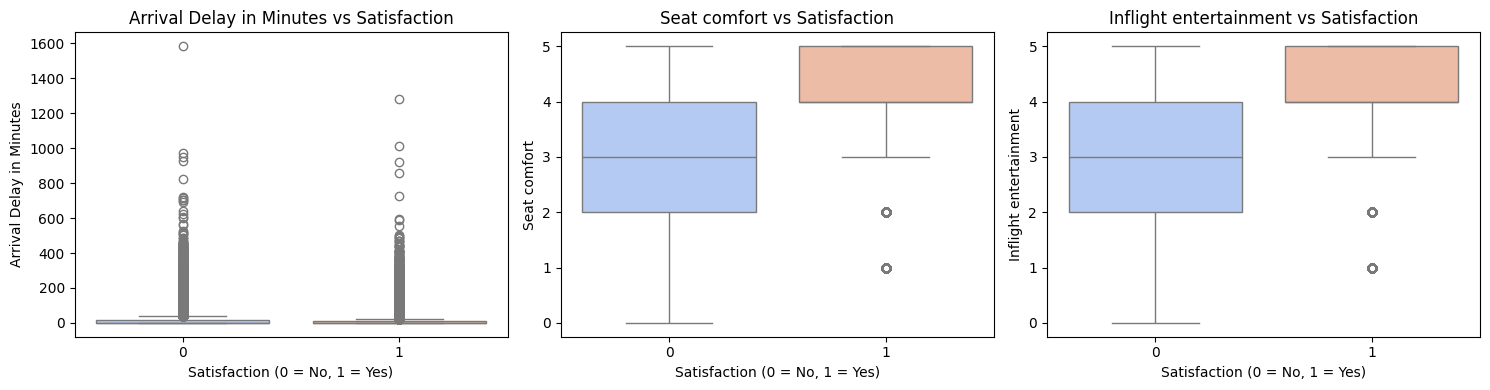

In [ ]:
# Step 5: Bivariate Analysis

# Features to check
features_to_check = ["Arrival Delay in Minutes", "Seat comfort", "Inflight entertainment"]

# Median comparison by satisfaction
print("Median comparison:")

# split the dataset into two groups based on the target variable
medians = (df_ready.groupby("target")[features_to_check].median().T)
print(medians)

# Boxplots to visualize distributions
plt.figure(figsize=(15, 4))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="target", y=col, hue="target", data=df_ready, palette="coolwarm", legend=False)
    plt.title(f"{col} vs Satisfaction")
    plt.xlabel("Satisfaction (0 = No, 1 = Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Median table (top):**  
- *Arrival Delay in Minutes*: median = 0 for both groups → delays don’t separate satisfied vs. not satisfied.  
- *Seat Comfort* & *Inflight Entertainment*: medians shift from 3 → 4 when moving from not satisfied to satisfied → strong signal.  

**Boxplots (bottom):**  
- *Arrival Delay*: lots of outliers, boxes overlap → weak predictor.  
- *Seat Comfort* & *Inflight Entertainment*: higher medians and less overlap for satisfied group → strong predictors.  

**Takeaway:**  
Service ratings (comfort, entertainment) are good predictors of satisfaction; delay is not.  

**Remember:**
- we’re seeing associations, not proving causation, but for modeling and prioritizing features, this is exactly the signal we need.

</div>

### Step 6: Multivariate Analysis (Feature ↔ Feature)
---
In this step, we look at **several features together** to understand how they interact.  
This goes beyond one-to-one comparisons and helps us uncover **combined effects, correlations, and patterns across multiple variables**.  

Multivariate analysis is especially useful for spotting feature relationships that only appear when looking at the dataset as a whole, and for preparing features that may work well together in modeling.

*Why do we do this?*

If two numeric features carry almost the same information, they are redundant. Too much redundancy can confuse models, inflate variance, and make interpretation messy. So, We should check correlations between numeric features.

**Actions:**
1. Compute a correlation matrix for numeric features. 
2. Visualize the correlation matrix using a heatmap.
3. Identify pairs of features with high correlation (e.g., |correlation| ≥ 0.7).

**Remember:** 
correlation ≠ causation; we are just detecting overlap in information.

<Figure size 1200x1000 with 0 Axes>

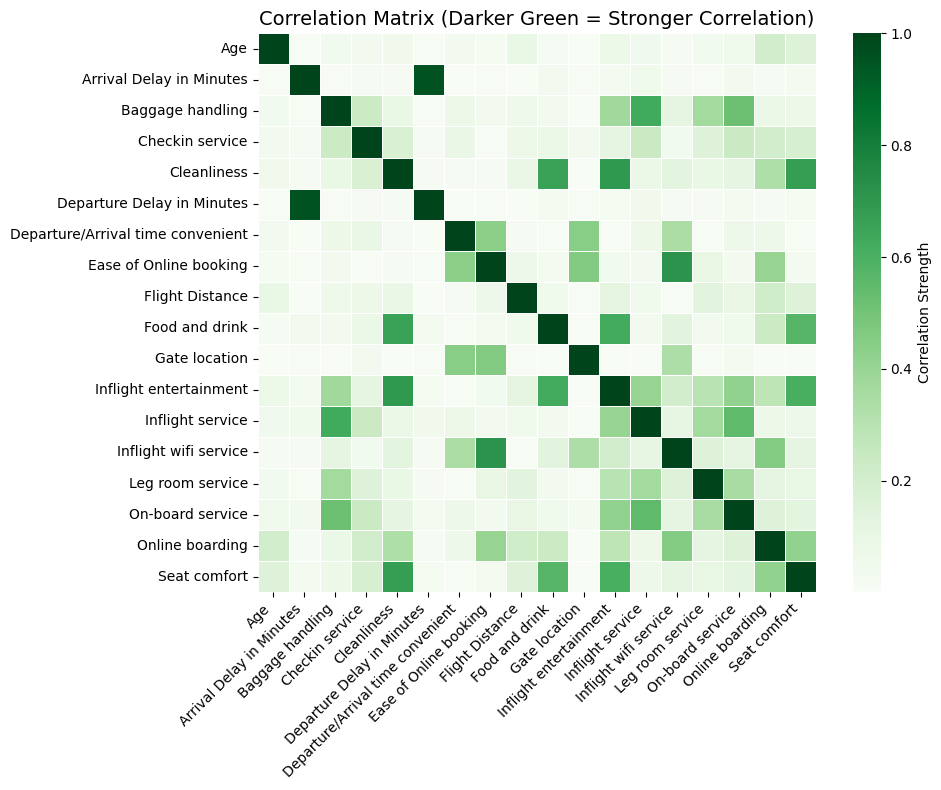

In [18]:
# Step 6: Multivariate Analysis

# Compute correlation matrix for numeric features
corr_matrix = num_imputed.corr()

# Set up the figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix.abs(),
    cmap="Greens",
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlation Strength"},
    annot=False  # no numbers on the cells
)

plt.title("Correlation Matrix (Darker Green = Stronger Correlation)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [19]:
# Find and print highly correlated pairs (|correlation| ≥ 0.7)
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= 0.7:
            high_corr_pairs.append((col1, col2, corr_val))

# Print results
print("\nHighly correlated feature pairs (|correlation| ≥ 0.7):")
for col1, col2, val in high_corr_pairs:
    print(f"{col1} ↔ {col2} : correlation = {val:.2f}")


Highly correlated feature pairs (|correlation| ≥ 0.7):
Arrival Delay in Minutes ↔ Departure Delay in Minutes : correlation = 0.95
Ease of Online booking ↔ Inflight wifi service : correlation = 0.72


<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Highly Correlated Pairs:**
  1. *Arrival Delay in Minutes* ↔ *Departure Delay in Minutes* (correlation = 0.95):  
     These features are almost identical. If a flight departs late, it also arrives late. One of these features can be dropped or combined.
  2. *Ease of Online Booking* ↔ *Inflight Wi-Fi Service* (correlation = 0.72):  
     These features are strongly related, reflecting the passenger’s digital experience. They are not fully redundant but overlap.

**Why correlation matters for PCA:**

- PCA creates new components as linear combinations of original features.
- If two features are highly correlated, they carry redundant information.
- PCA naturally handles this redundancy by combining correlated features into a single principal component that explains the shared variance.
</div>

## 3. Principal Component Analysis (PCA)
---
We have many features in the dataset that may contribute to describing the target variable. Some of these features are correlated and carry the same information.  

**PCA reduces this complexity** by combining the correlated features into fewer new ones, called _principal components_.  

- These principal components capture the **most variation** in the data.  
- They are formed as **linear combinations** of the original features.  

This way, we can **see the big picture with less complexity**.  

**Actions:**
1. Standardize the numeric features using `StandardScaler`.
2. Fit PCA and calculate the explained variance for each principal component.
3. Plot the cumulative explained variance to determine the optimal number of components.
4. Visualize the first two principal components (PC1 and PC2) in a scatter plot.

In [21]:
# Step 7: Principal Component Analysis (PCA)

# Select numeric features (already in num_imputed)
X = num_imputed
y = df_ready["target"] 

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_

# Print explained variance info
print("Explained variance per component:", explained_var)

# Cumulative explained variance
cumulative_var = explained_var.cumsum()
print("\nCumulative explained variance:", cumulative_var)


Explained variance per component: [0.21429043 0.13126712 0.12097086 0.10841106 0.06915531 0.05350425
 0.05155848 0.04953322 0.03842365 0.02965194 0.02660483 0.02493961
 0.02040391 0.01796918 0.01655368 0.01392931 0.01029534 0.00253783]

Cumulative explained variance: [0.21429043 0.34555755 0.46652841 0.57493947 0.64409477 0.69759903
 0.74915751 0.79869073 0.83711439 0.86676632 0.89337115 0.91831076
 0.93871466 0.95668385 0.97323753 0.98716683 0.99746217 1.        ]


<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Explained Variance:**
   - PC1 explains ~21% of the variance in the data.
   - PC2 explains ~13% of the variance in the data.
   - PC3 explains ~12% of the variance in the data.
   - Together, the first 8 components explain ~80% of the variance.

</div>

### 3.1. Scree Plot: Choosing the Number of Components  
---

A **scree plot** shows how much variation in the data is explained by each principal component.  

- Each point on the line represents one component.  
- The **height** of the point tells us how much information (variance) that component captures.  
- By looking at the curve, we can decide **how many components are worth keeping**.  

Usually, we look for the **"elbow point"**, the place where the curve starts to flatten. Beyond this point, adding more components does not add much new information.  

This helps us simplify the dataset while still keeping most of the important patterns.  


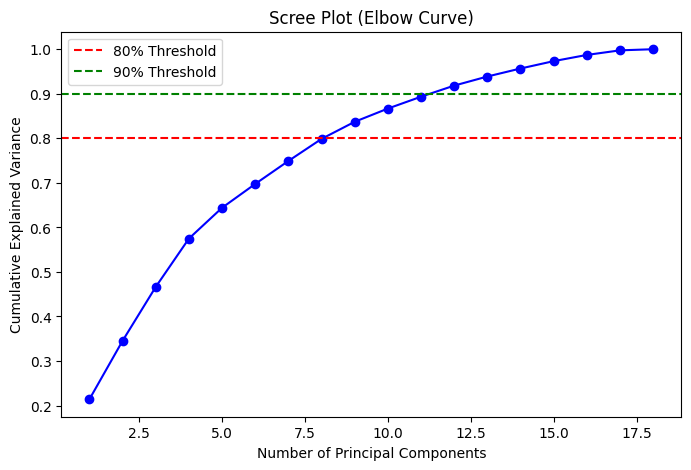

In [23]:
# Plot the cumulative explained variance (scree plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker="o", color="blue")
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.axhline(y=0.9, color="g", linestyle="--", label="90% Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Elbow Curve)")
plt.legend()
plt.show()

<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**Scree Plot Observations:**
   - The "elbow" in the curve occurs around PC3–PC4, indicating diminishing returns after these components.
   - Retaining ~8 components captures most of the dataset's variance.
</div>


### 3.2. Scatter Plot of PC1 vs. PC2  
---

After applying PCA, the first two principal components (PC1 and PC2) capture the **largest share of variation** in the dataset.  

By plotting them against each other, we can:  
- **Visualize the data in 2D** while still keeping most of the important information.  
- **See patterns, clusters, or separation** between satisfied and not satisfied passengers.  
- Get a clearer picture of how well PCA summarizes the dataset.  

Each point represents a passenger, positioned by their values on PC1 and PC2.  
Coloring the points by the satisfaction label (0 = Not Satisfied, 1 = Satisfied) shows how these groups spread in the reduced feature space.  

>**Analogy:** This is like shining a light on a 3D object to see its shadow on a wall. Even though it’s now 2D, the shadow still reveals the main shape and structure of the object.  



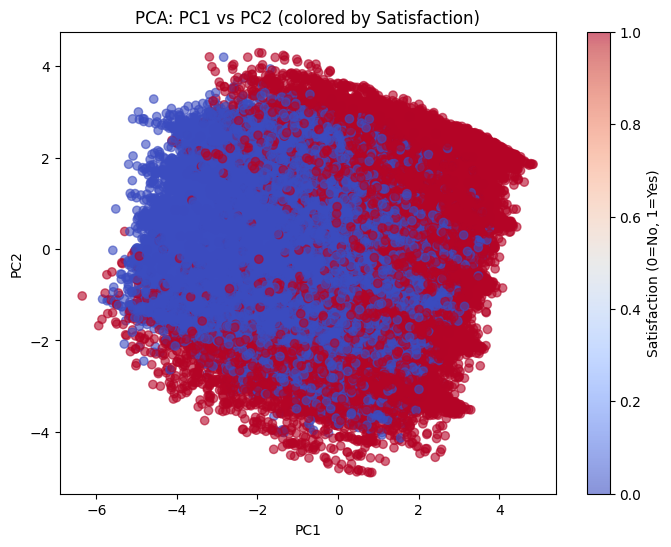

In [24]:
# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2 (colored by Satisfaction)")
plt.colorbar(label="Satisfaction (0=No, 1=Yes)")
plt.show()

<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

**PC1 vs PC2 Scatter Plot:**

Each point represents one passenger, placed according to their values on the first two principal components (PC1 and PC2).  
The colors show satisfaction: **blue = not satisfied (0)**, **red = satisfied (1)**.  

- The two groups overlap a lot, which means satisfaction is influenced by many factors and cannot be separated perfectly in just two dimensions.  
- Still, there is a visible trend: more **red points** appear toward the right, while more **blue points** cluster toward the left.  

</div>

### 4. Communicate Insights
---

In this step, we will summarize the findings from our analysis and provide actionable insights for decision-makers.

**Actions:**
1. Identify the top 2–3 factors driving passenger satisfaction based on PCA and EDA results.
2. Write a clear, concise summary of the findings.
3. Provide actionable recommendations for improving passenger satisfaction.

In [27]:
# Step 8: Communicate Results

# Top loadings (features contributing most to each principal component)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_var))],
    index=X.columns
)

# Display top contributing features for PC1 and PC2
print("\nTop contributing features for PC1:")
print(loadings["PC1"].sort_values(key=abs, ascending=False).round(2).head(5))

print("\nTop contributing features for PC2:")
print(loadings["PC2"].sort_values(key=abs, ascending=False).round(2).head(5))


Top contributing features for PC1:
Inflight entertainment    0.42
Cleanliness               0.35
Seat comfort              0.34
Food and drink            0.30
Online boarding           0.29
Name: PC1, dtype: float64

Top contributing features for PC2:
Ease of Online booking               0.54
Inflight wifi service                0.45
Gate location                        0.43
Departure/Arrival time convenient    0.42
Inflight entertainment              -0.18
Name: PC2, dtype: float64


<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

##### **Principal Component Equations**  

$$
\small
\text{PC1} = 0.42 \times \text{Inflight entertainment} 
+ 0.35 \times \text{Cleanliness} 
+ 0.34 \times \text{Seat comfort} 
+ 0.30 \times \text{Food and drink} 
+ 0.29 \times \text{Online boarding}
$$

$$
\small
\text{PC2} = 0.54 \times \text{Ease of Online booking} 
+ 0.45 \times \text{Inflight wifi service} 
+ 0.43 \times \text{Gate location} 
+ 0.42 \times \text{Departure/Arrival time convenient} 
- 0.18 \times \text{Inflight entertainment}
$$
</div>

<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 5px;">

### Airline Passenger Satisfaction Insights 
---

#### The 2 Main Drivers  

1. **Comfort & Service Quality (Most Important)**  
   - Things like inflight entertainment, cleanliness, seat comfort, and food & drink.  
   - These features make up most of **PC1 (~21% of variance)**.  
   - Better comfort and service make passengers more satisfied.

2. **Digital & Travel Experience (Second Most Important)**  
   - Includes online booking, inflight Wi-Fi, gate location, and schedule convenience.  
   - These show up strongly in **PC2 (~13% of variance)**.  
   - Better digital touchpoints mean happier passengers.


#### What This Means  

- Passengers care most about **how comfortable the flight is** and **how smooth their journey feels online and at the airport**.  
- These two factors explain a big part of why people are satisfied (or not).  

#### Things to Keep in Mind  

- Satisfaction comes from a **mix of many features**, not just one or two.  
- PCA helps us see the *main patterns*, but it doesn’t perfectly split satisfied from unsatisfied passengers.  
- To go further, we’d need other models that can describe satisfaction more precisely.  

**Takeaway for us as data scientists:** 
   - PCA is great for reducing complexity and spotting the *big picture* drivers in messy data.  
 

</div>


## 5. Wrap-Up: Key Takeaways
---

This notebook explored the **Passenger Satisfaction Challenge** using a structured approach to data exploration and dimensionality reduction. Below are the key takeaways:

#### Key Steps:
1. **Data Exploration**:
   - Examined the dataset structure, handled missing values, and identified key features.
   - Conducted univariate, bivariate, and multivariate analyses to understand relationships between features and the target variable.

2. **Dimensionality Reduction**:
   - Applied PCA to reduce the dataset's dimensionality while retaining ~80% of the variance.
   - Identified the top components driving passenger satisfaction.

3. **Insights and Recommendations**:
   - **Primary Driver**: In-flight comfort and service quality (e.g., seat comfort, cleanliness, inflight entertainment).
   - **Secondary Driver**: Digital and logistics experience (e.g., online booking, inflight Wi-Fi, gate logistics).
   - Recommendations were provided to improve these areas.
